# Pandasの使い方

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# csvデータの読み込み
iris = pd.read_csv("iris.csv")

## 1.ETL

In [3]:
# データの確認
iris.head(6)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [4]:
# 行の取り出し

iris["SepalLength"][1:5]
# iris.SepalLength
# iris.ix[:,"SepalLength"]

1    4.9
2    4.7
3    4.6
4    5.0
Name: SepalLength, dtype: float64

In [9]:
# 列の取り出し
iris[iris.SepalLength>7.5]
# iris[iris.SepalLength>7.5].count()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


In [29]:
# 行列の取り出し
iris.ix[[i for i in range(0,150,30)],["PetalLength","Species"]]


,PetalLength,Species
0,1.4,setosa
30,1.6,setosa
60,3.5,versicolor
90,4.4,versicolor
120,5.7,virginica


In [30]:
iris.ix[iris[iris.SepalLength>7.5].index.get_values(),"Species"]

105    virginica
117    virginica
118    virginica
122    virginica
131    virginica
135    virginica
Name: Species, dtype: object

In [ ]:
# iris.to_csv("output_iris.csv")

## 2. データの操作

### Seriesとは
- Pandasが使用するデータ構造
- index(見出し)とデータ部分を持つ

In [31]:
# Series
pd.Series([1,2,3,4,5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

### DataFrameとは
- Pandasが使用する行列型のデータ構造
- indexとcolumn(列名)とデータ部分を持つ
- 列方向のデータは全て同じデータ型である必要がある

In [32]:
# DataFrame
data = [[1,2,3],[4,5,6],[7,8,9]]
pd.DataFrame(data)

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [34]:
# データの結合1
data = [[1,2,3],[4,5,6],[7,8,9]]
dat = pd.DataFrame(data)

data2 = ["a","b","c"]
dat["new_col"] = data2

dat

,0,1,2,new_col
0,1,2,3,a
1,4,5,6,b
2,7,8,9,c


In [36]:
# データの結合2
pd.concat([dat,dat],axis=0)

,0,1,2,new_col
0,1,2,3,a
1,4,5,6,b
2,7,8,9,c
0,1,2,3,a
1,4,5,6,b
2,7,8,9,c


In [37]:
pd.concat([dat,dat],axis=1)

,0,1,2,new_col,0,1,2,new_col
0,1,2,3,a,1,2,3,a
1,4,5,6,b,4,5,6,b
2,7,8,9,c,7,8,9,c


### 3. 一変量データ

- データは変量数（次元、列数)によって分析方法がかわる
- 次元は大別すると定量と定性にわけられる

In [39]:
dat_one = pd.read_csv("iris.csv").SepalLength

In [40]:
dat_one.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: SepalLength, dtype: float64

#### 代表値

In [41]:
dat_one.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLength, dtype: float64

- 個数
- 平均
- 標準偏差
- 最小値
- 25%quantile
- 50%qunatile(中央値)
- 75%quantile
- 最大値

In [43]:
print dat_one.sum()
print dat_one.mean()
print dat_one.std()

876.5
5.84333333333
0.828066127978


#### 可視化

- データは代表値だけではなく、グラフによる直感的な理解が必要
- 可視化はmatplotlibがよく使われる
- そのラッパーであるseabornや、ggplot2なども使用される
- pandasはmatplotlibへのインターフェイスをもっている

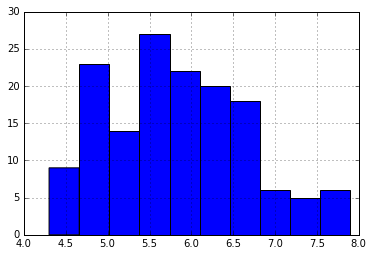

In [51]:
# ヒストグラム
dat_one.hist()

### 4. 集計

- データを扱う際、集計されていない生データであることがある
- 定量データを定性データにもとづいて、集計する作業が発生する
- 集計に使用した定性データが新たな行列名になることがある

In [58]:
iris = pd.read_csv("iris.csv")

In [60]:
iris_agg = iris.ix[:,["SepalLength","Species"]]

In [61]:
iris_agg.head()

,SepalLength,Species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa


- 集計にはgroupbyを使用する

In [63]:
# 集計
iris_agg.groupby("Species").sum()

,SepalLength
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


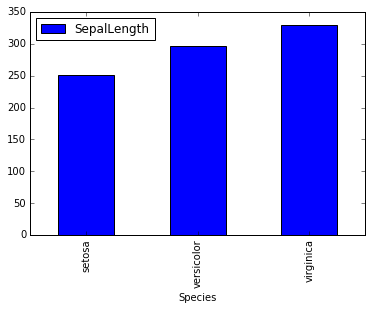

In [65]:
# 棒グラフ
iris_agg.groupby("Species").sum().plot(kind="bar")

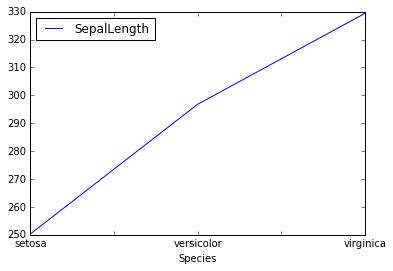

In [66]:
# 線グラフ
iris_agg.groupby("Species").sum().plot()

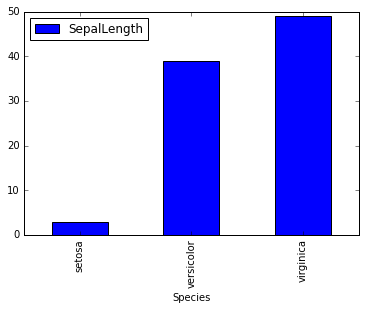

In [70]:
iris_agg[iris["SepalLength"]>5.5].groupby("Species").count().plot(kind="bar")

### 5. 二変量

- 複数の定量データ列を使用し、データごとの関係を確認できる

※ 比較に関しては集計後に同一列内で行うところに違いがある

In [73]:
iris_two = pd.read_csv("iris.csv")

In [79]:
# 相関係数
print iris_two.PetalLength.corr(iris_two.PetalWidth)
print iris_two.SepalLength.corr(iris_two.SepalWidth)

0.962757097051
-0.109369249951


In [80]:
# 共分散
print iris_two.PetalLength.cov(iris_two.PetalWidth)
print iris_two.SepalLength.cov(iris_two.SepalWidth)

1.29638747204
-0.0392684563758


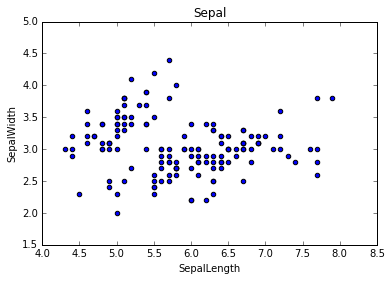

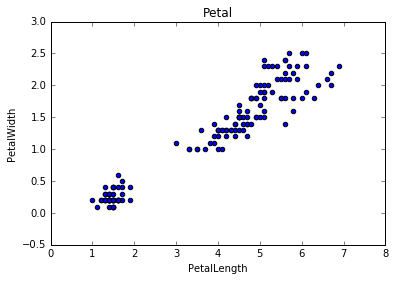

In [87]:
iris_two.plot(x = "SepalLength",y = "SepalWidth",kind="scatter",title="Sepal")
iris_two.plot(x = "PetalLength",y = "PetalWidth",kind="scatter",title="Petal")

In [91]:
iris_two.groupby("Species").SepalLength.corr(iris_two.SepalWidth)

Species
setosa        0.746780
versicolor    0.525911
virginica     0.457228
Name: SepalLength, dtype: float64

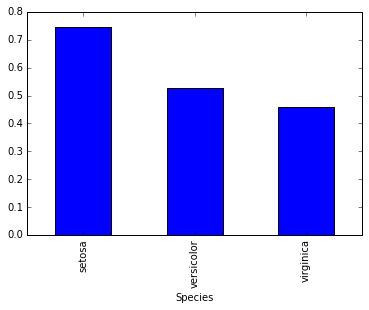

In [92]:
iris_two.groupby("Species").SepalLength.corr(iris_two.SepalWidth).plot(kind="bar")

### ※発展


#### 1:領域ごとの手法
- ABC分析等:上記の要素の組み合わせおよび、対象の専門知識を組み合わせたもの
- 回帰分析等:上記に統計的な知識を組み合わせたのもの
- 時系列分析等:上記知識にその他学問（経済学、心理学、政治学・・・）を組み合わせたもの
- 多変量解析等:より大量の変数間の関係性を対象にするもの
- 機械学習等:数学の最適化知識を組み合わせたもの

#### 2:周辺プロセスや技術
- データパイプライン:データの収集や整形技術
- データ・ウェアハウス/データマート:分析に称するためのデータを蓄積する技術
- データベース:データを蓄積しておく技術知識
- ビッグデータ:大量のデータを扱うための手法、技術の集合名
- リサーチャー/アナリスト:課題発見/解決/のためにデータを活用する役職
- データサイエンティスト:統計/数学知識によるモデリングと、それを実現するためのエンジニアリング技術で課題解決する役職